<a href="https://colab.research.google.com/github/ZefraAlseif/Project1_Wine_Network/blob/main/RegressionModel_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adapting the original wine data to a regression model and classification model

In [51]:
#@title Data as Numpy Arrays
import matplotlib.pyplot as plt
import numpy as np
# This time we need to also import pandas
import pandas as pd
from io import StringIO

# Read in white wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')

# Read in red wine data
# Uses PANDAS (pd) to create a PANDAS DataFrame Object:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

red['type'] = 1
white['type'] = 0

wines = red.append(white, ignore_index = True)

# Import SKLEARN
import sklearn

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Specify the data -
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

y = np.ravel(wines.quality)

# Splitting the data set for training and validating - Done with SKLEARN
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.25, random_state = 45)

# Converting X_train & X_test DataFrame s to TF sensors
# Will use NumPy, TF, & Keras after this
# import tensorflow as tf

Xtrain = X_train.to_numpy()
X_valid = X_valid.to_numpy()

X_valid
# In reality:
# [1] ALL THE Xtrain patterns (with their y_train targets)
# will be used for TRAINING ([TR]), as Xtrain & y_train
# [2] MOST OF THE X_valid patterns (and their y_valid targets)
# will be used for VALIDATION ([TT]), as X_val & y_val
# BUT WE WILL SET ASIDE THE LAST 10 for "testing" ([TS])
# as X_tst & y_tst

# Retain the first 1615 patterns for validation ([TT])
Xval = X_valid[:1615]
Xval.shape

# and now set aside the last 10 for test
Xtst = X_valid[1615:]
Xtst.shape

# Setting Aside the Patterns to Normalize them
Xtrain_N = Xtrain
Xval_N = Xval
Xtst_N = Xtst
mean = Xtrain_N.mean(axis=0)
Xtrain_N -= mean
std = Xtrain_N.std(axis=0)
Xtrain_N /= std
Xval_N -= mean
Xval_N /= std
Xtst_N -=mean 
Xtst_N /=std

# Same for the corresponding targets
# Retain the first 1615 for validation ([TT])
y_val = y_valid[:1615]
y_val.shape

y_tst = y_valid[1615:]
y_tst.shape 
y_tst

# Now, in addition, create the targets as one-hot-encoded 4 quality levels
# We will track these few targets through the conversion process
y_train[272:283]

# Function create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3 or 4 
def to_4cs(x):
  lx = len(x)
  results = np.zeros(lx)
  for i in range(lx):
    # print("start")
    xa = x[i];
    if xa <= 3:
      results[i] = 1
    elif xa <= 6:
      results[i] = 2
    elif xa <= 8:
      results[i] = 3
    else:
      results[i] = 4
    # results [i, label] = 1
  results = results.astype(int)
  return results

train_labels = to_4cs(y_train)
val_labels = to_4cs(y_val)
tst_labels = to_4cs(y_tst)

# Let's verify that the training targets that we are tracking 
# were converted to levels (1 = BAD; 2 = Medium; 3 = GOOD; 4- Excellent) correctly:
train_labels[272:283]

# Now, one shot encoding of all 3 target arrays
# define a function to do the 

def to_one_hot(labels, dimension = 4):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels-1):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)
one_hot_tst_labels = to_one_hot(tst_labels)

#Let's verify that the training targets we have tracked were
# one-hot encoded correctly
Xtrain.shape

# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
# Xtrain (4872, 12)...y_train (4872,)...train_labels(4872,)....one_hot_train_labels (4872,4)
# FOR VALIDATING:
# Xval (1615, 12)...y_val (1615,)...val_labels(1615,)...one_hot_val_labels (1615,4)
# FOR TESTING:
# Xtst (10, 12)...y_tst (10,)...tst_labels(10,)... one_hot_tst_labels (10,4)
# PLEASE DO NOT CHANGE THE NAMES OF THESE VARIABLES (So that instructor can use them)


(4872, 12)

# II.1 Regression Model 1 (regmodl1)

In [52]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl1():
  regmodl1 = keras.Sequential(
      [
        layers.Dense(8, activation = 'relu'),
        layers.Dense(1)
      ]
)
  regmodl1.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return regmodl1

regmodl1 = build_regmodl1()
history_regmodl1 = regmodl1.fit(x = Xtrain_N,y = y_train, batch_size = 32, epochs = 50, verbose = 2, validation_data = (Xval_N,y_val), validation_freq = 1)

#regmodl1.summary()

Epoch 1/50
153/153 - 1s - loss: 25.6624 - mae: 4.8861 - val_loss: 17.4666 - val_mae: 3.9747 - 875ms/epoch - 6ms/step
Epoch 2/50
153/153 - 0s - loss: 12.1670 - mae: 3.1930 - val_loss: 7.3711 - val_mae: 2.3684 - 302ms/epoch - 2ms/step
Epoch 3/50
153/153 - 0s - loss: 5.0542 - mae: 1.8609 - val_loss: 3.5892 - val_mae: 1.5027 - 270ms/epoch - 2ms/step
Epoch 4/50
153/153 - 0s - loss: 2.7423 - mae: 1.3101 - val_loss: 2.4073 - val_mae: 1.2011 - 281ms/epoch - 2ms/step
Epoch 5/50
153/153 - 0s - loss: 1.8526 - mae: 1.0723 - val_loss: 1.7227 - val_mae: 1.0105 - 265ms/epoch - 2ms/step
Epoch 6/50
153/153 - 0s - loss: 1.3449 - mae: 0.9081 - val_loss: 1.3078 - val_mae: 0.8733 - 251ms/epoch - 2ms/step
Epoch 7/50
153/153 - 0s - loss: 1.0447 - mae: 0.7962 - val_loss: 1.0571 - val_mae: 0.7844 - 253ms/epoch - 2ms/step
Epoch 8/50
153/153 - 0s - loss: 0.8658 - mae: 0.7226 - val_loss: 0.8853 - val_mae: 0.7209 - 265ms/epoch - 2ms/step
Epoch 9/50
153/153 - 0s - loss: 0.7483 - mae: 0.6722 - val_loss: 0.7825 - val

## Plot of Regression Model 1 and Final Values









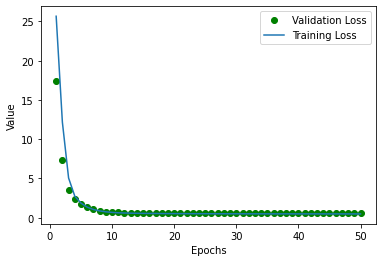

Final Training loss:  0.48152193427085876 
Final Training MAE:  0.5442901849746704
Final Validation loss:  0.5412675738334656 
Final Validation MAE:  0.5635526180267334


In [53]:
# Plot the validation and training loss
plt.plot(range(1, len(history_regmodl1.history['val_loss']) + 1), history_regmodl1.history['val_loss'], 'go', label = "Validation Loss")
plt.plot(range(1, len(history_regmodl1.history['loss']) + 1), history_regmodl1.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_regmodl1.history['loss'][-1],"\nFinal Training MAE: ", history_regmodl1.history['mae'][-1])
print("Final Validation loss: ",history_regmodl1.history['val_loss'][-1],"\nFinal Validation MAE: ", history_regmodl1.history['val_mae'][-1])

# II.2 Regression Model 2 (regmodl2)

In [54]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl2():
  regmodl2 = keras.Sequential(
      [
        layers.Dense(100, activation = 'relu'),
        layers.Dense(50, activation = 'relu'),
        layers.Dense(80, activation = 'relu'),
        layers.Dense(20, activation='relu'), 
        layers.Dense(1)
      ]
  )
  regmodl2.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return regmodl2

regmodl2 = build_regmodl2()
history_regmodl2 = regmodl2.fit(x = Xtrain_N,y = y_train, batch_size = 64, epochs = 150, verbose = 2, validation_data = (Xval_N,y_val), validation_freq = 1)

#regmodl2.summary()

Epoch 1/150
77/77 - 1s - loss: 4.2089 - mae: 1.4428 - val_loss: 1.3655 - val_mae: 0.8676 - 1s/epoch - 14ms/step
Epoch 2/150
77/77 - 0s - loss: 0.9273 - mae: 0.7424 - val_loss: 0.8589 - val_mae: 0.6877 - 169ms/epoch - 2ms/step
Epoch 3/150
77/77 - 0s - loss: 0.6934 - mae: 0.6407 - val_loss: 0.9022 - val_mae: 0.7279 - 219ms/epoch - 3ms/step
Epoch 4/150
77/77 - 0s - loss: 0.6180 - mae: 0.6142 - val_loss: 0.6097 - val_mae: 0.5951 - 209ms/epoch - 3ms/step
Epoch 5/150
77/77 - 0s - loss: 0.5832 - mae: 0.5934 - val_loss: 0.9723 - val_mae: 0.7749 - 200ms/epoch - 3ms/step
Epoch 6/150
77/77 - 0s - loss: 0.5602 - mae: 0.5801 - val_loss: 0.6132 - val_mae: 0.5942 - 177ms/epoch - 2ms/step
Epoch 7/150
77/77 - 0s - loss: 0.5282 - mae: 0.5598 - val_loss: 0.8322 - val_mae: 0.7134 - 209ms/epoch - 3ms/step
Epoch 8/150
77/77 - 0s - loss: 0.5223 - mae: 0.5636 - val_loss: 0.5517 - val_mae: 0.5636 - 212ms/epoch - 3ms/step
Epoch 9/150
77/77 - 0s - loss: 0.5222 - mae: 0.5621 - val_loss: 0.6860 - val_mae: 0.6463 -

## Plot of Regression Model 2

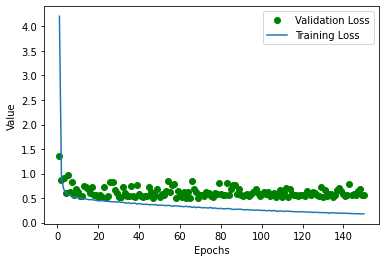

Final Training loss:  0.17591653764247894 
Final Training MAE:  0.3224025368690491
Final Validation loss:  0.5634228587150574 
Final Validation MAE:  0.5464485883712769


In [55]:
# Plot the validation and training loss
plt.plot(range(1, len(history_regmodl2.history['val_loss']) + 1), history_regmodl2.history['val_loss'], 'go',label = "Validation Loss")
plt.plot(range(1, len(history_regmodl2.history['loss']) + 1), history_regmodl2.history['loss'], label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_regmodl2.history['loss'][-1],"\nFinal Training MAE: ", history_regmodl2.history['mae'][-1])
print("Final Validation loss: ",history_regmodl2.history['val_loss'][-1],"\nFinal Validation MAE: ", history_regmodl2.history['val_mae'][-1])

# II.3 Regression Model 3 (regmodl3)

In [56]:
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl3():
  regmodl3 = keras.Sequential(
      [
        layers.Dense(21, activation = 'relu'),
        layers.Dense(350, activation = 'relu'),
        layers.Dense(120, activation = 'relu'),
        layers.Dense(30, activation='relu'), 
        layers.Dense(1)
      ]
  )
  regmodl3.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return regmodl3

regmodl3 = build_regmodl3()
history_regmodl3 = regmodl3.fit(x = Xtrain_N,y = y_train, batch_size = 128, epochs = 70, verbose = 2, validation_data = (Xval_N,y_val), validation_freq = 1)

#regmodl3.summary()

Epoch 1/70
39/39 - 1s - loss: 6.8432 - mae: 1.9031 - val_loss: 2.7382 - val_mae: 1.1497 - 1s/epoch - 28ms/step
Epoch 2/70
39/39 - 0s - loss: 1.5217 - mae: 0.9483 - val_loss: 1.4615 - val_mae: 0.8877 - 222ms/epoch - 6ms/step
Epoch 3/70
39/39 - 0s - loss: 1.1251 - mae: 0.8254 - val_loss: 1.0014 - val_mae: 0.7379 - 166ms/epoch - 4ms/step
Epoch 4/70
39/39 - 0s - loss: 0.8816 - mae: 0.7310 - val_loss: 1.2151 - val_mae: 0.8845 - 177ms/epoch - 5ms/step
Epoch 5/70
39/39 - 0s - loss: 0.7593 - mae: 0.6816 - val_loss: 1.1147 - val_mae: 0.8521 - 185ms/epoch - 5ms/step
Epoch 6/70
39/39 - 0s - loss: 0.7447 - mae: 0.6761 - val_loss: 1.3648 - val_mae: 0.9121 - 174ms/epoch - 4ms/step
Epoch 7/70
39/39 - 0s - loss: 0.7016 - mae: 0.6639 - val_loss: 1.0191 - val_mae: 0.7998 - 171ms/epoch - 4ms/step
Epoch 8/70
39/39 - 0s - loss: 0.6540 - mae: 0.6340 - val_loss: 0.7843 - val_mae: 0.6850 - 169ms/epoch - 4ms/step
Epoch 9/70
39/39 - 0s - loss: 0.6613 - mae: 0.6373 - val_loss: 1.2874 - val_mae: 0.9450 - 172ms/ep

## Plot of Regression Model 3

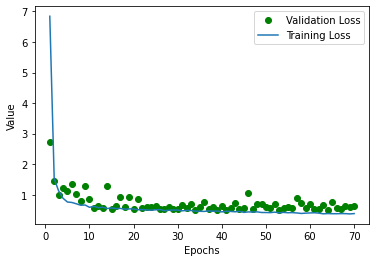

Final Training loss:  0.38047388195991516 
Final Training MAE:  0.4826459288597107
Final Validation loss:  0.6355962157249451 
Final Validation MAE:  0.6040862798690796


In [57]:
# Plot the validation and training loss
plt.plot(range(1, len(history_regmodl3.history['val_loss']) + 1), history_regmodl3.history['val_loss'], 'go',label = "Validation Loss")
plt.plot(range(1, len(history_regmodl3.history['loss']) + 1), history_regmodl3.history['loss'],label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history_regmodl3.history['loss'][-1],"\nFinal Training MAE: ", history_regmodl3.history['mae'][-1])
print("Final Validation loss: ",history_regmodl3.history['val_loss'][-1],"\nFinal Validation MAE: ", history_regmodl3.history['val_mae'][-1])

## Predicting the Output

In [58]:
predict_labels = (regmodl3.predict(Xtst))
predict_labels_T=predict_labels.T
error = y_tst - predict_labels_T
predict_table = pd.DataFrame(Xtst)
predict_table['activation'] = predict_labels
predict_table['target'] = y_tst.T
predict_table['error'] = error.T
# Renaming the columns of the table
predict_table.columns.values[0] = "f1"
predict_table.columns.values[1] = "f2"
predict_table.columns.values[2] = "f3"
predict_table.columns.values[3] = "f4"
predict_table.columns.values[4] = "f5"
predict_table.columns.values[5] = "f6"
predict_table.columns.values[6] = "f7"
predict_table.columns.values[7] = "f8"
predict_table.columns.values[8] = "f9"
predict_table.columns.values[9] = "f10"
predict_table.columns.values[10] = "f11"
predict_table.columns.values[11] = "f12"
display(predict_table)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,activation,target,error
0,0.137149,0.627975,-0.828750,1.280312,-0.197503,0.753517,0.720658,1.113674,0.328897,-0.616129,-1.252613,-0.564708,4.892373,5,0.107627
1,-0.554519,-0.661784,0.264803,2.298507,-0.518084,0.697634,0.297192,1.531990,0.266162,-0.818442,-1.420569,-0.564708,5.575786,5,-0.575786
2,-1.246188,0.443723,-0.555362,-0.756080,-0.634659,-1.146497,-1.114362,-2.209238,0.642574,-0.211504,2.526387,-0.564708,5.741578,7,1.258422
3,-0.631371,2.040568,-1.648916,-0.713655,-0.314078,-0.643552,-1.202584,0.067884,1.709075,-0.278941,0.762853,1.770826,5.117139,6,0.882861
4,-0.323963,-0.968870,0.333150,-0.819717,-0.022641,0.921165,0.667725,-0.438143,-0.863075,-0.548691,-1.168636,-0.564708,5.762867,5,-0.762867
5,-0.247111,0.443723,0.059762,0.983338,-0.372365,-0.140607,0.632436,0.708852,-0.110250,-0.076629,-0.916702,-0.564708,5.052988,5,-0.052988
6,-1.015632,-0.109030,0.059762,-0.713655,-0.838664,0.250572,0.385414,-1.770681,0.956251,-0.751004,1.854565,-0.564708,5.972532,6,0.027468
7,-0.938780,-0.600367,0.606538,-0.883354,-0.576371,0.641751,0.032526,-1.524414,-1.114016,0.732622,1.042779,-0.564708,5.416930,6,0.583070
8,0.060297,0.873643,-0.008585,-0.713655,0.181364,0.027041,-1.096717,0.870781,0.517103,0.800060,-0.412836,1.770826,5.405855,7,1.594145
9,0.137149,-0.600367,-0.692056,1.110612,-0.401509,-0.252373,-0.620318,0.236560,-2.243253,-1.155629,-0.664769,-0.564708,5.522316,6,0.477684
